
Train ROC AUC: 0.9976647994328798
Test ROC AUC: 0.9778510510405869


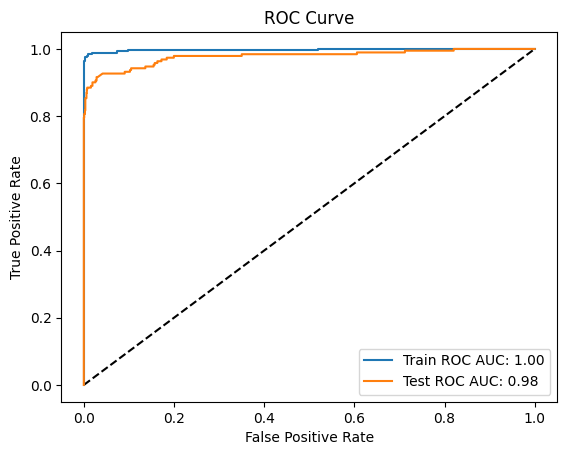

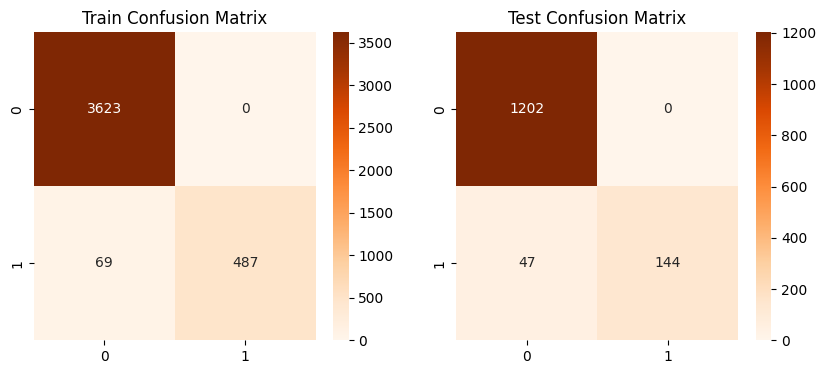


Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3623
           1       1.00      0.88      0.93       556

    accuracy                           0.98      4179
   macro avg       0.99      0.94      0.96      4179
weighted avg       0.98      0.98      0.98      4179


Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.75      0.86       191

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393


Email: Congratulations! You won a lottery. Click here to claim your prize!
Prediction: 🚫 Spam Detected!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving/loading the model
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv", encoding='ISO-8859-1')
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=42)

# Improved Naive Bayes Model with TfidfVectorizer
clf = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', lowercase=True)),  # Text transformation
    ('nb', MultinomialNB())  # Naive Bayes classifier
])

# Train the model
clf.fit(X_train, y_train)

# Save the trained model
joblib.dump(clf, "spam_detector.pkl")

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluates the model and provides detailed metrics"""

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    roc_auc_train = roc_auc_score(y_train, pred_prob_train)
    roc_auc_test = roc_auc_score(y_test, pred_prob_test)

    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # ROC Curve
    fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, cmap="Oranges", fmt='d', ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Oranges", fmt='d', ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")
    plt.show()

    # Classification Report
    print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train))
    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

# Evaluate the model
evaluate_model(clf, X_train, X_test, y_train, y_test)

# Function to detect spam in new emails
def detect_spam(email_text):
    """Predicts whether an email is spam or not"""
    clf = joblib.load("spam_detector.pkl")  # Load trained model
    prediction = clf.predict([email_text])[0]
    return "🚫 Spam Detected!" if prediction == 1 else "✅ Not Spam"

# Example usage
sample_email = "Congratulations! You won a lottery. Click here to claim your prize!"
result = detect_spam(sample_email)
print("\nEmail:", sample_email)
print("Prediction:", result)
